### Lab-6 : Self-Practice

In this week self practice, you will apply [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) on multi-class problem. In the following 3-class generated blobs you will train SVCs in a one-vs-one and one-vs-rest approach. Draw the decision bounderies of each approach.

#### Question: Recall what the difference between one-vs-one and on-vs-rest for multiclass classification is. 

In [1]:
from sklearn.datasets import make_blobs 
import matplotlib.pyplot as plt


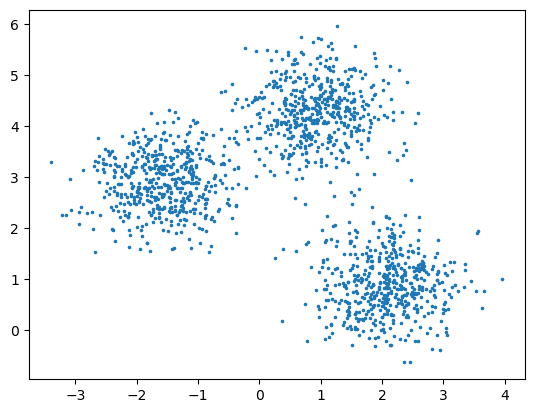

In [2]:
# we create the dataset
X, y = make_blobs(n_samples=1500, centers=3, n_features=2, cluster_std=0.60,
                  random_state=0)

plt.scatter(X[:, 0], X[:, 1],  marker=".", s=10)

### Create a svc model to classify the data point using one-vs-one approach and draw the desicion bounderies (hyperplan and margins)

In [3]:
# split the data into training and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [4]:
import numpy as np
def plot_decision_boundary_with_margin(X, y, model, ax):
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
   
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')

    
    # # plot the decision boundaries and margins for each binary classifier
    for estimator in model.estimators_:
        w = estimator.coef_[0]
        a = -w[0] / w[1]
        xx = np.linspace(x_min, x_max)
        yy = a * xx - (estimator.intercept_[0]) / w[1]

        margin = 1 / np.sqrt(np.sum(estimator.coef_ ** 2))
        yy_down = yy - np.sqrt(1 + a ** 2) * margin
        yy_up = yy + np.sqrt(1 + a ** 2) * margin

        ax.plot(xx, yy, 'k-')
        ax.plot(xx, yy_down, 'k--')
        ax.plot(xx, yy_up, 'k--')



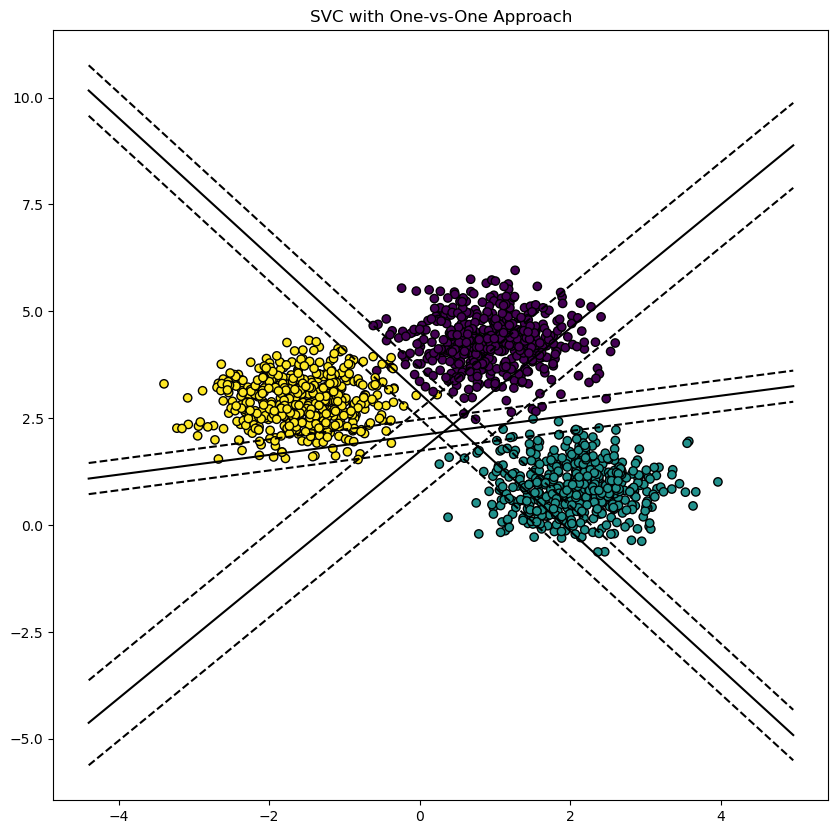

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier

model_ovo = OneVsOneClassifier(SVC(kernel='linear', C=1.0))
model_ovo.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(10, 10))
plot_decision_boundary_with_margin(X, y, model_ovo, ax)
ax.set_title('SVC with One-vs-One Approach')
plt.show()


### Create a svc model to classify the data points using one-vs-rest approach and draw the desicion bounderies

Text(0.5, 1.0, 'SVC with One-vs-Rest Approach')

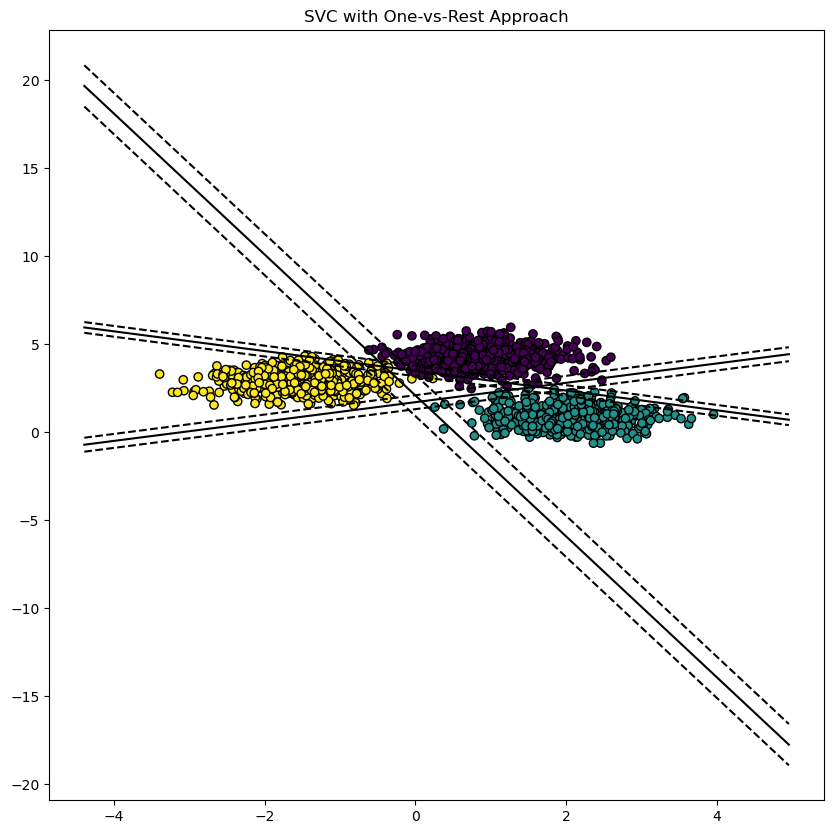

In [6]:
from sklearn.multiclass import OneVsRestClassifier
model_ovr = OneVsRestClassifier(SVC(kernel='linear', C=1.0))

model_ovr.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(10, 10))
plot_decision_boundary_with_margin(X, y, model_ovr, ax)
ax.set_title('SVC with One-vs-Rest Approach')

### Using 5-fold cross validation compare the accuracies of each method

In [14]:

### Using 5-fold cross validation compare the accuracies of each method

from sklearn.model_selection import cross_val_score

scores_ovo = cross_val_score(model_ovo, X, y, cv=5, scoring='accuracy')
scores_ovr = cross_val_score(model_ovr, X, y, cv=5, scoring='accuracy')


print('One-vs-One:', scores_ovo)
print('One-vs-Rest:', scores_ovr)

print('One-vs-One:', scores_ovo.mean())
print('One-vs-Rest:', scores_ovr.mean())

# classification report

# from sklearn.metrics import classification_report
# y_pred = model_ovo.predict(X_test)
# print("One VS one:\n",classification_report(y_test, y_pred))

# y_pred = model_ovr.predict(X_test)
# print("One VS Rest:\n",classification_report(y_test, y_pred))

One-vs-One: [0.99       0.99666667 1.         1.         1.        ]
One-vs-Rest: [0.99       0.99333333 1.         0.99666667 1.        ]
One-vs-One: 0.9973333333333333
One-vs-Rest: 0.9960000000000001
